In [38]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

58500


# Initialize Cell_List class

In [138]:
reload(ia)
reload(ia.get_img_info)
reload(ia.analysis)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.alignment_tools)
reload(ia.classes)
reload(ia.domain_tools)

<module 'ImageAnalysis3.domain_tools' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\domain_tools.py'>

In [146]:
# initialize cell-list
param = {'data_folder':r'Y:\20190305_IMR90_CTP05_DNA-FISH',
         'save_folder':r'I:\Pu_temp\DNA_unique',
         'experiment_type': 'DNA',
         'num_threads': 24,
         'correction_folder':r'I:\Corrections',
         'experiment_folder':r'Y:\20190302_IMR90_CTP05_intronFISH\Experiment',
         'map_folder':r'Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\distmap_EM',
         };

lst = ia.classes.Cell_List(param, _chosen_fovs=[], _exclude_fovs=[])

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 224
- Number of field of views: 60
- Importing csv file: Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- Importing csv file: Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\Region_Positions.csv
- header: ['region', 'chr', 'start', 'end', 'midpoint']
-- 651 genomic regions loaded!
218 folders are found according to color-usage annotation.


# Segmentation for all (only for the very first time)

## generate cell_segmentations and manually correct

In [ ]:
%matplotlib notebook
lst._pick_cell_segmentations(_min_shape_ratio=0.035, _shrink_percent=13, 
                             _save=True, _force=False)

In [ ]:
# run this to save updated nucleus status
new_labels, remove_cts, append_cts = lst._update_cell_segmentations(_return_all=True)

## another option: translate from old segmentation folder

In [ ]:
# generate rotation matrix
experiment_folder = r'Y:\20190302_IMR90_CTP05_intronFISH\Experiment'
pos_file_before = os.path.join(experiment_folder, 'positions_10x_before.txt')    
pos_file_after = os.path.join(experiment_folder, 'positions_10x_after.txt')    
R,t = alignment_tools.align_manual_points(pos_file_before, pos_file_after)

In [ ]:
# required inputs
old_seg_folder = r'Y:\20190302_IMR90_CTP05_intronFISH\Analysis\segmentation'
old_dapi_folder = r'Y:\20190302_IMR90_CTP05_intronFISH\H0R0'
old_correction_folder = r'I:\Corrections'
new_correction_folder = r'I:\Corrections'
# load previously generated rotation matrix 
experiment_folder = r'Y:\20190302_IMR90_CTP05_intronFISH\Experiment'
rotation_mat = np.load(os.path.join(experiment_folder, 'rotation.npy'))
# translate segmentations!
new_seg_labels = lst._translate_old_segmentations(old_seg_folder, old_dapi_folder, rotation_mat,_force=True, 
                                                  _old_correction_folder=old_correction_folder,_return_all=True,
                                                  )

# Create cell objects

+ Create Cell_Data objects for field of view: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59]
++ preparing variables
++ choose dapi images from folder: Y:\20190305_IMR90_CTP05_DNA-FISH\H0R0.
+ Load segmentation for fov 0
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_00_segmentation.npy


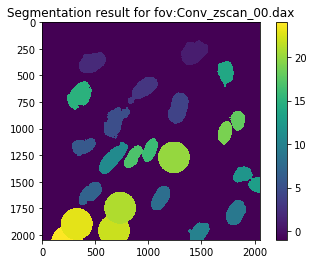

+ Create cell_data objects, num_of_cell:24
+ Load segmentation for fov 1
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_01_segmentation.npy


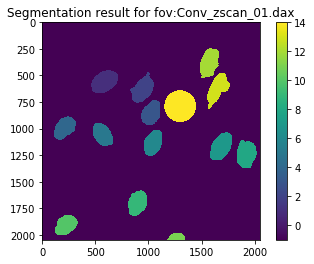

+ Create cell_data objects, num_of_cell:14
+ Load segmentation for fov 2
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_02_segmentation.npy


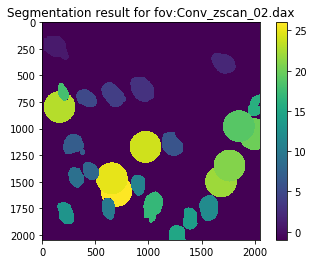

+ Create cell_data objects, num_of_cell:26
+ Load segmentation for fov 3
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_03_segmentation.npy


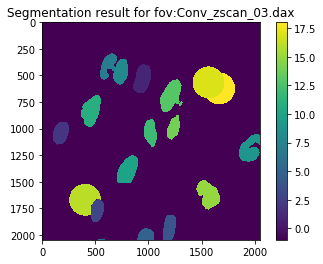

+ Create cell_data objects, num_of_cell:18
+ Load segmentation for fov 4
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_04_segmentation.npy


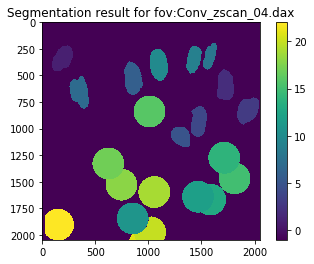

+ Create cell_data objects, num_of_cell:22
+ Load segmentation for fov 5
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_05_segmentation.npy


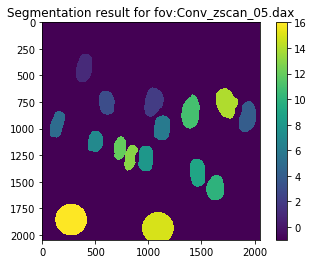

+ Create cell_data objects, num_of_cell:16
+ Load segmentation for fov 6
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_06_segmentation.npy


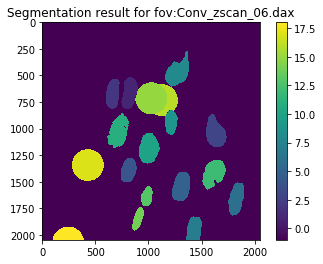

+ Create cell_data objects, num_of_cell:18
+ Load segmentation for fov 7
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_07_segmentation.npy


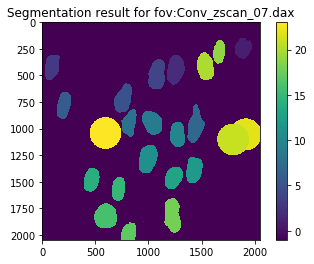

+ Create cell_data objects, num_of_cell:23
+ Load segmentation for fov 8
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_08_segmentation.npy


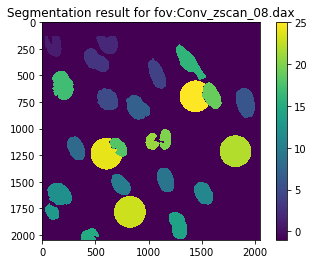

+ Create cell_data objects, num_of_cell:25
+ Load segmentation for fov 9
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_09_segmentation.npy


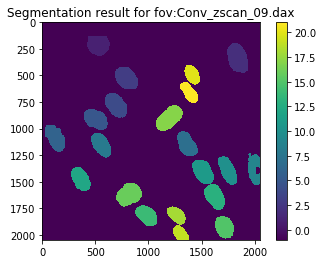

+ Create cell_data objects, num_of_cell:21
+ Load segmentation for fov 10
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_10_segmentation.npy


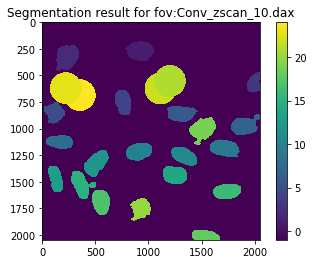

+ Create cell_data objects, num_of_cell:24
+ Load segmentation for fov 11
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_11_segmentation.npy


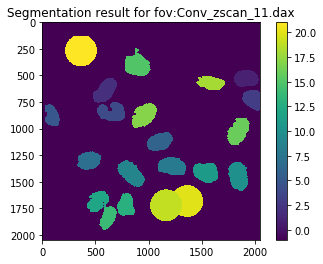

+ Create cell_data objects, num_of_cell:21
+ Load segmentation for fov 12
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_12_segmentation.npy


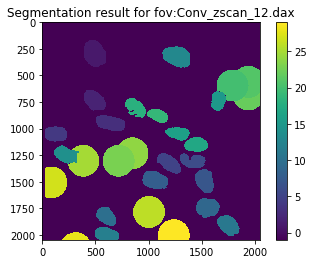

+ Create cell_data objects, num_of_cell:29
+ Load segmentation for fov 13
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_13_segmentation.npy


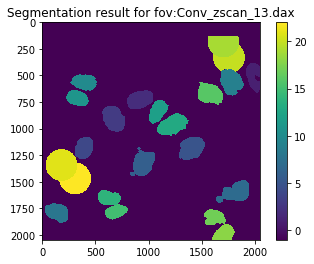

+ Create cell_data objects, num_of_cell:22
+ Load segmentation for fov 14
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_14_segmentation.npy


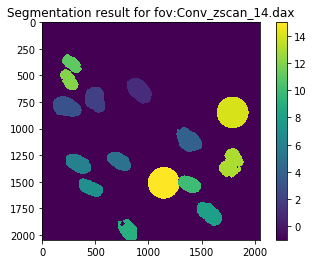

+ Create cell_data objects, num_of_cell:15
+ Load segmentation for fov 15
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_15_segmentation.npy


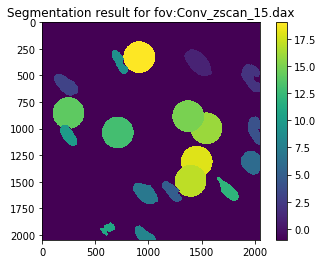

+ Create cell_data objects, num_of_cell:19
+ Load segmentation for fov 16
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_16_segmentation.npy


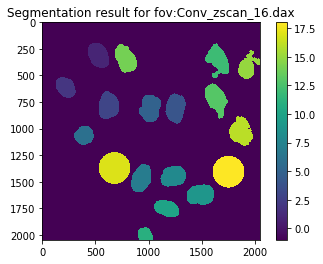

+ Create cell_data objects, num_of_cell:18
+ Load segmentation for fov 17
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_17_segmentation.npy


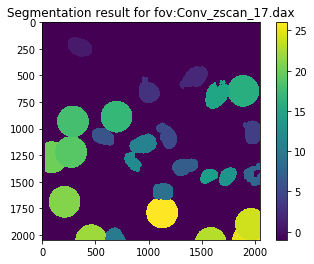

+ Create cell_data objects, num_of_cell:26
+ Load segmentation for fov 18
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_18_segmentation.npy


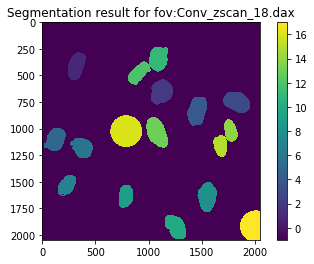

+ Create cell_data objects, num_of_cell:17
+ Load segmentation for fov 19
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_19_segmentation.npy


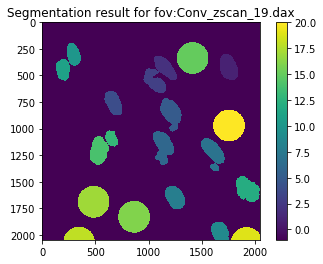

+ Create cell_data objects, num_of_cell:20
+ Load segmentation for fov 20
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_20_segmentation.npy


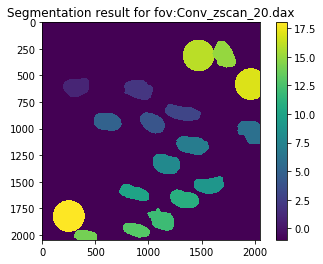

+ Create cell_data objects, num_of_cell:18
+ Load segmentation for fov 21
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_21_segmentation.npy


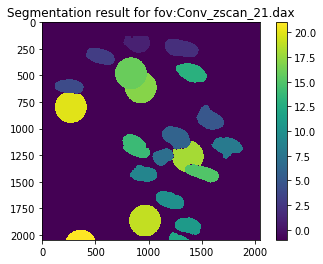

+ Create cell_data objects, num_of_cell:21
+ Load segmentation for fov 22
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_22_segmentation.npy


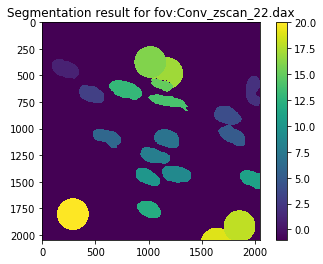

+ Create cell_data objects, num_of_cell:20
+ Load segmentation for fov 23
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_23_segmentation.npy


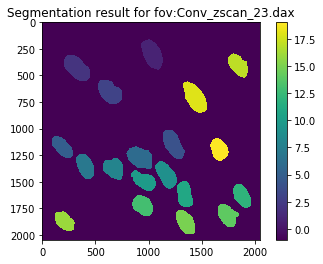

+ Create cell_data objects, num_of_cell:19
+ Load segmentation for fov 24
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_24_segmentation.npy


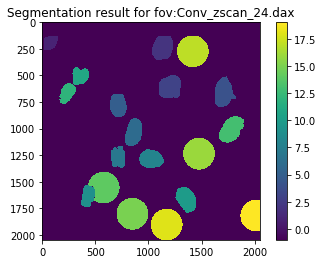

+ Create cell_data objects, num_of_cell:19
+ Load segmentation for fov 25
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_25_segmentation.npy


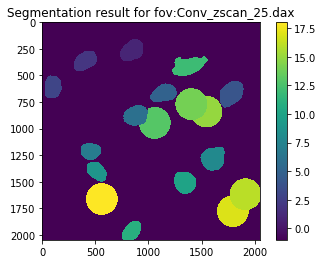

+ Create cell_data objects, num_of_cell:18
+ Load segmentation for fov 26
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_26_segmentation.npy


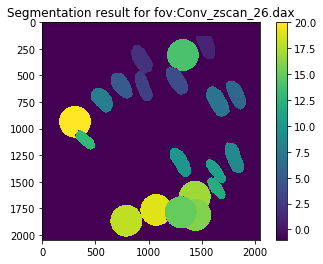

+ Create cell_data objects, num_of_cell:20
+ Load segmentation for fov 27
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_27_segmentation.npy


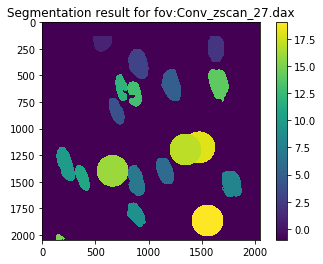

+ Create cell_data objects, num_of_cell:19
+ Load segmentation for fov 28
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_28_segmentation.npy


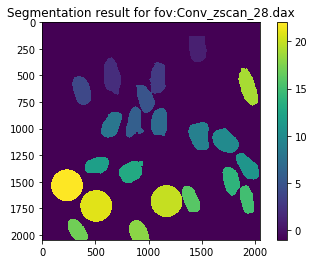

+ Create cell_data objects, num_of_cell:22
+ Load segmentation for fov 29
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_29_segmentation.npy


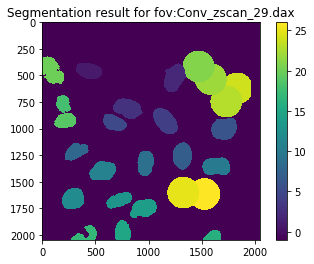

+ Create cell_data objects, num_of_cell:26
+ Load segmentation for fov 30
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_30_segmentation.npy


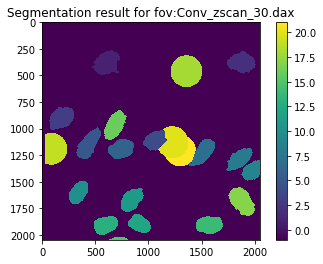

+ Create cell_data objects, num_of_cell:21
+ Load segmentation for fov 31
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_31_segmentation.npy


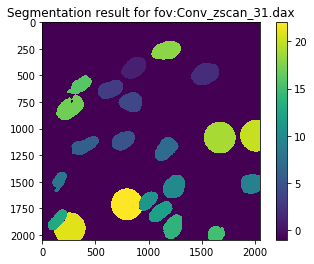

+ Create cell_data objects, num_of_cell:22
+ Load segmentation for fov 32
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_32_segmentation.npy


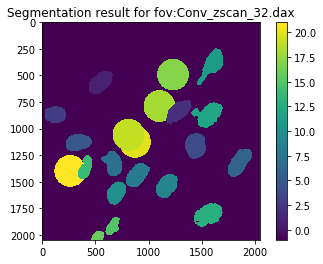

+ Create cell_data objects, num_of_cell:21
+ Load segmentation for fov 33
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_33_segmentation.npy


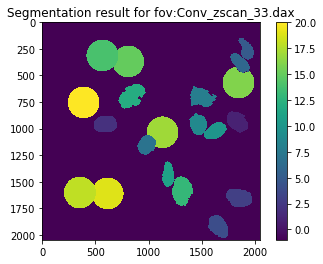

+ Create cell_data objects, num_of_cell:20
+ Load segmentation for fov 34
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_34_segmentation.npy


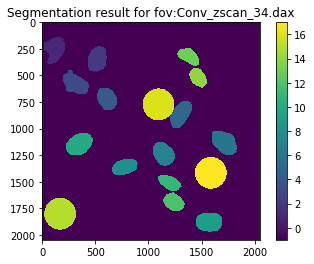

+ Create cell_data objects, num_of_cell:17
+ Load segmentation for fov 35
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_35_segmentation.npy


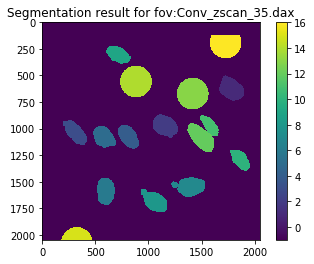

+ Create cell_data objects, num_of_cell:16
+ Load segmentation for fov 36
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_36_segmentation.npy


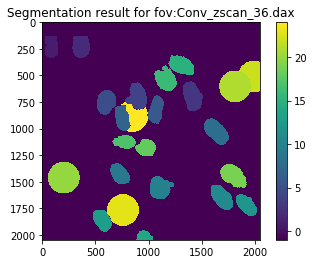

+ Create cell_data objects, num_of_cell:24
+ Load segmentation for fov 37
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_37_segmentation.npy


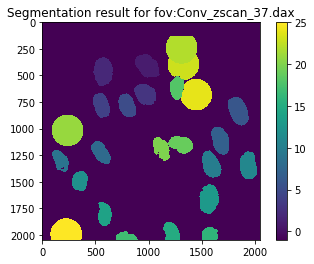

+ Create cell_data objects, num_of_cell:25
+ Load segmentation for fov 38
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_38_segmentation.npy


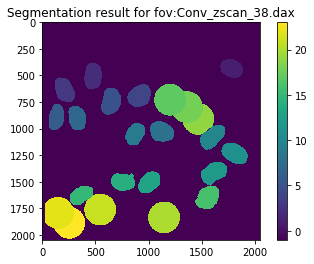

+ Create cell_data objects, num_of_cell:23
+ Load segmentation for fov 39
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_39_segmentation.npy


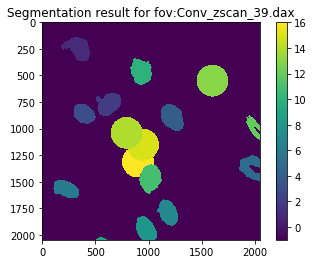

+ Create cell_data objects, num_of_cell:16
+ Load segmentation for fov 40
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_40_segmentation.npy


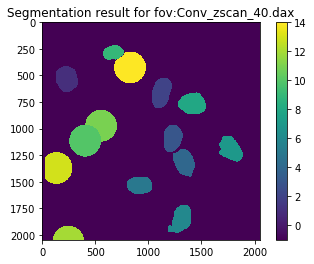

+ Create cell_data objects, num_of_cell:14
+ Load segmentation for fov 41
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_41_segmentation.npy


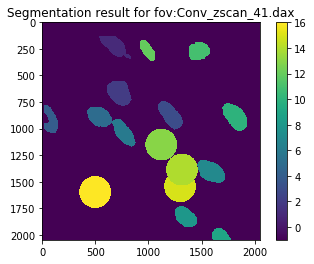

+ Create cell_data objects, num_of_cell:16
+ Load segmentation for fov 42
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_42_segmentation.npy


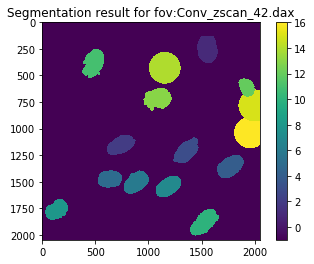

+ Create cell_data objects, num_of_cell:15
+ Load segmentation for fov 43
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_43_segmentation.npy


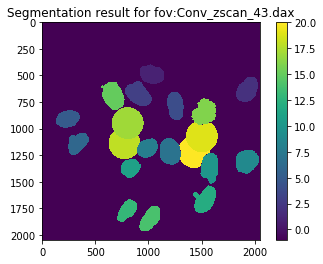

+ Create cell_data objects, num_of_cell:20
+ Load segmentation for fov 44
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_44_segmentation.npy


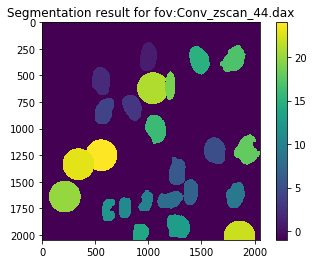

+ Create cell_data objects, num_of_cell:24
+ Load segmentation for fov 45
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_45_segmentation.npy


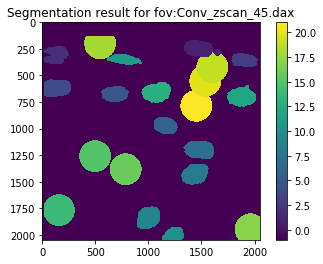

+ Create cell_data objects, num_of_cell:21
+ Load segmentation for fov 46
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_46_segmentation.npy


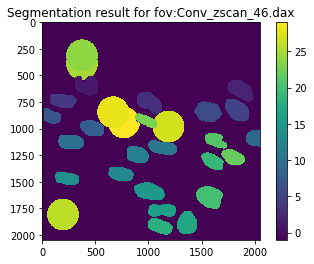

+ Create cell_data objects, num_of_cell:29
+ Load segmentation for fov 47
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_47_segmentation.npy


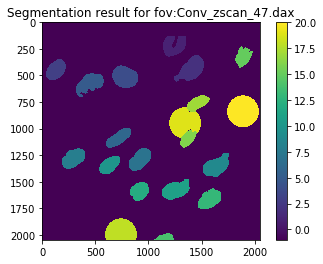

+ Create cell_data objects, num_of_cell:20
+ Load segmentation for fov 48
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_48_segmentation.npy


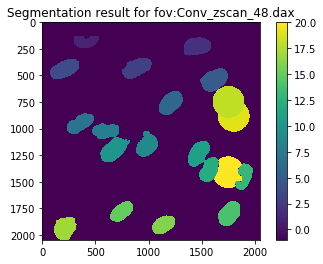

+ Create cell_data objects, num_of_cell:20
+ Load segmentation for fov 49
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_49_segmentation.npy


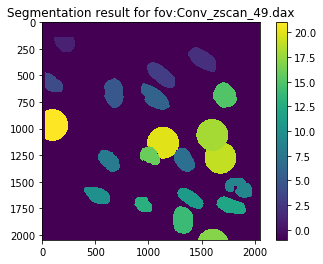

+ Create cell_data objects, num_of_cell:21
+ Load segmentation for fov 50
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_50_segmentation.npy


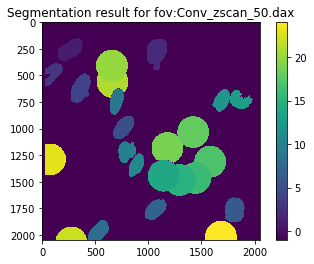

+ Create cell_data objects, num_of_cell:24
+ Load segmentation for fov 51
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_51_segmentation.npy


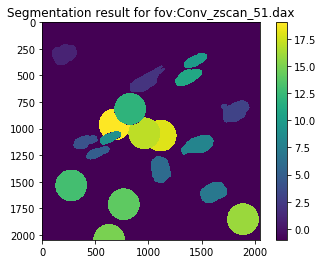

+ Create cell_data objects, num_of_cell:19
+ Load segmentation for fov 52
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_52_segmentation.npy


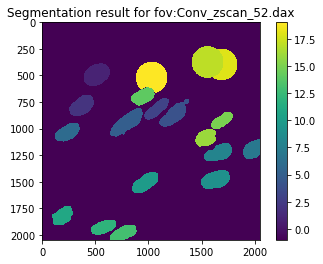

+ Create cell_data objects, num_of_cell:19
+ Load segmentation for fov 53
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_53_segmentation.npy


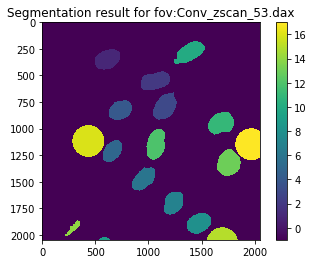

+ Create cell_data objects, num_of_cell:17
+ Load segmentation for fov 54
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_54_segmentation.npy


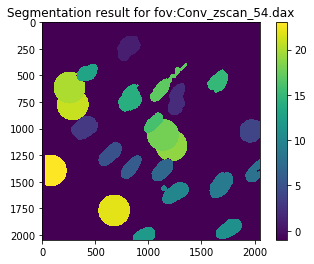

+ Create cell_data objects, num_of_cell:23
+ Load segmentation for fov 55
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_55_segmentation.npy


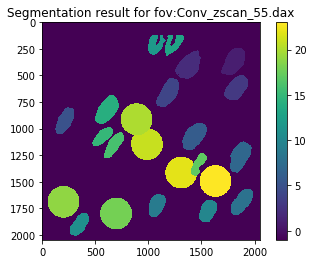

+ Create cell_data objects, num_of_cell:23
+ Load segmentation for fov 56
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_56_segmentation.npy


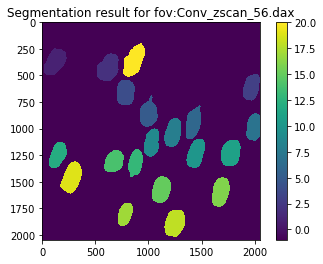

+ Create cell_data objects, num_of_cell:20
+ Load segmentation for fov 57
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_57_segmentation.npy


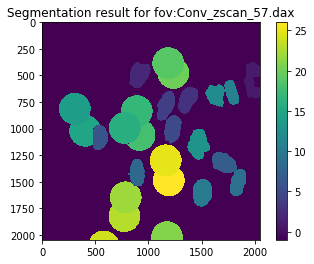

+ Create cell_data objects, num_of_cell:26
+ Load segmentation for fov 58
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_58_segmentation.npy


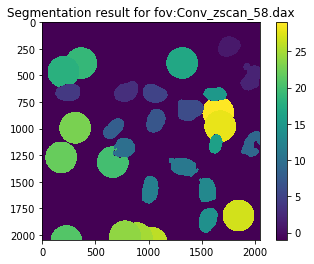

+ Create cell_data objects, num_of_cell:29
+ Load segmentation for fov 59
-- directly load segmentation result from:Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\segmentation\Conv_zscan_59_segmentation.npy


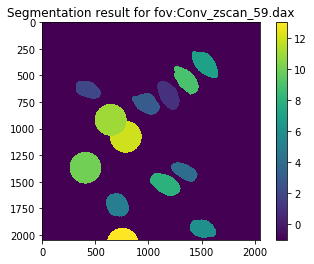

+ Create cell_data objects, num_of_cell:13
+ Creating 1238 cells with 24 threads.


In [147]:
%matplotlib inline
fov_ids = np.arange(0, 60)
#fov_ids = np.arange(3, 4)

lst._create_cells_fov(fov_ids, _drift_size=370, _coord_sel=[400,400], _load_segmentation=False,
                      _load_exist_info=False, _exclude_attrs=['segmentation_label'])

# Crop unique images

In [ ]:
# crop from original images
lst._crop_image_for_cells('unique', _load_in_ram=False, 
                          _overwrite_cell_info=True, _save=True)

# Generate chromosomes

## automatically generate chromosomes and manually pick

In [ ]:
# pick
%matplotlib notebook
lst._get_chromosomes_for_cells('unique',_max_count=90)

## update manually picked chromosomes

In [ ]:
# update
lst._update_chromosomes_for_cells()

# Get region coordinates

## multi-fitting spots

In [ ]:
# multi-fitting
lst._spot_finding_for_cells('unique', _max_fitting_threads=20, _save=True)

## pick spots by EM

In [24]:
%matplotlib inline
# whether overwrite picked pts
_overwrite_picked_pts = True

lst._pick_spots_for_cells('unique', _pick_type='EM', _num_threads=24,
                          _save_inter_plot=False, _save_to_info=True, _local_size=5,
                           _w_ccdist=1, _w_lcdist=0.1, _w_int=1, _w_nbdist=3,
                          _save_plot=True, 
                          _overwrite=_overwrite_picked_pts)


+ Pick spots and convert to distmap.
++ start multi-processing picking spots by EM for 618 cells



# Generate population distance maps

+++ maximum distance-map size is 651
+++ filtered out by loss probability, fov:0, cell:23, chrom:0
+++ filtered out by loss probability, fov:7, cell:0, chrom:0
+++ filtered out by loss probability, fov:8, cell:0, chrom:0
+++ filtered out by loss probability, fov:10, cell:2, chrom:1
+++ filtered out by loss probability, fov:11, cell:3, chrom:1
+++ filtered out by loss probability, fov:13, cell:0, chrom:1
+++ filtered out by loss probability, fov:15, cell:1, chrom:1
+++ filtered out by loss probability, fov:19, cell:19, chrom:1
+++ filtered out by loss probability, fov:22, cell:9, chrom:1
+++ filtered out by loss probability, fov:23, cell:16, chrom:0
+++ filtered out by loss probability, fov:24, cell:0, chrom:0
+++ filtered out by loss probability, fov:25, cell:7, chrom:2
+++ filtered out by loss probability, fov:25, cell:15, chrom:0
+++ filtered out by loss probability, fov:25, cell:15, chrom:1
+++ filtered out by loss probability, fov:25, cell:17, chrom:2
+++ filtered out by loss proba

+++ filtered out by loss probability, fov:33, cell:4, chrom:0
+++ filtered out by loss probability, fov:35, cell:15, chrom:0
+++ filtered out by loss probability, fov:37, cell:24, chrom:0
+++ filtered out by loss probability, fov:37, cell:24, chrom:1
+++ filtered out by loss probability, fov:38, cell:21, chrom:0
+++ filtered out by loss probability, fov:39, cell:13, chrom:1
+++ filtered out by loss probability, fov:40, cell:11, chrom:0
+++ filtered out by loss probability, fov:41, cell:2, chrom:1
+++ filtered out by loss probability, fov:44, cell:21, chrom:0
+++ filtered out by loss probability, fov:45, cell:1, chrom:0
+++ filtered out by loss probability, fov:45, cell:1, chrom:1
+++ filtered out by loss probability, fov:45, cell:2, chrom:0
+++ filtered out by loss probability, fov:45, cell:2, chrom:1
+++ filtered out by loss probability, fov:45, cell:13, chrom:0
+++ filtered out by loss probability, fov:45, cell:13, chrom:1
+++ filtered out by loss probability, fov:45, cell:16, chrom:

E:\Users\puzheng\Documents\ImageAnalysis3\classes.py:1445: RuntimeWarning: invalid value encountered in less
  _averaged_map = np.nansum(_total_map < _contact_th, axis=0) / \
E:\Users\puzheng\Documents\ImageAnalysis3\classes.py:1446: RuntimeWarning: invalid value encountered in less
  (np.nansum(_total_map < _contact_th, axis=0)+np.nansum(_total_map > _contact_th, axis=0))
E:\Users\puzheng\Documents\ImageAnalysis3\classes.py:1446: RuntimeWarning: invalid value encountered in greater
  (np.nansum(_total_map < _contact_th, axis=0)+np.nansum(_total_map > _contact_th, axis=0))


++ generating distance map for 2145 chromosomes.
++ saving contact distance map.


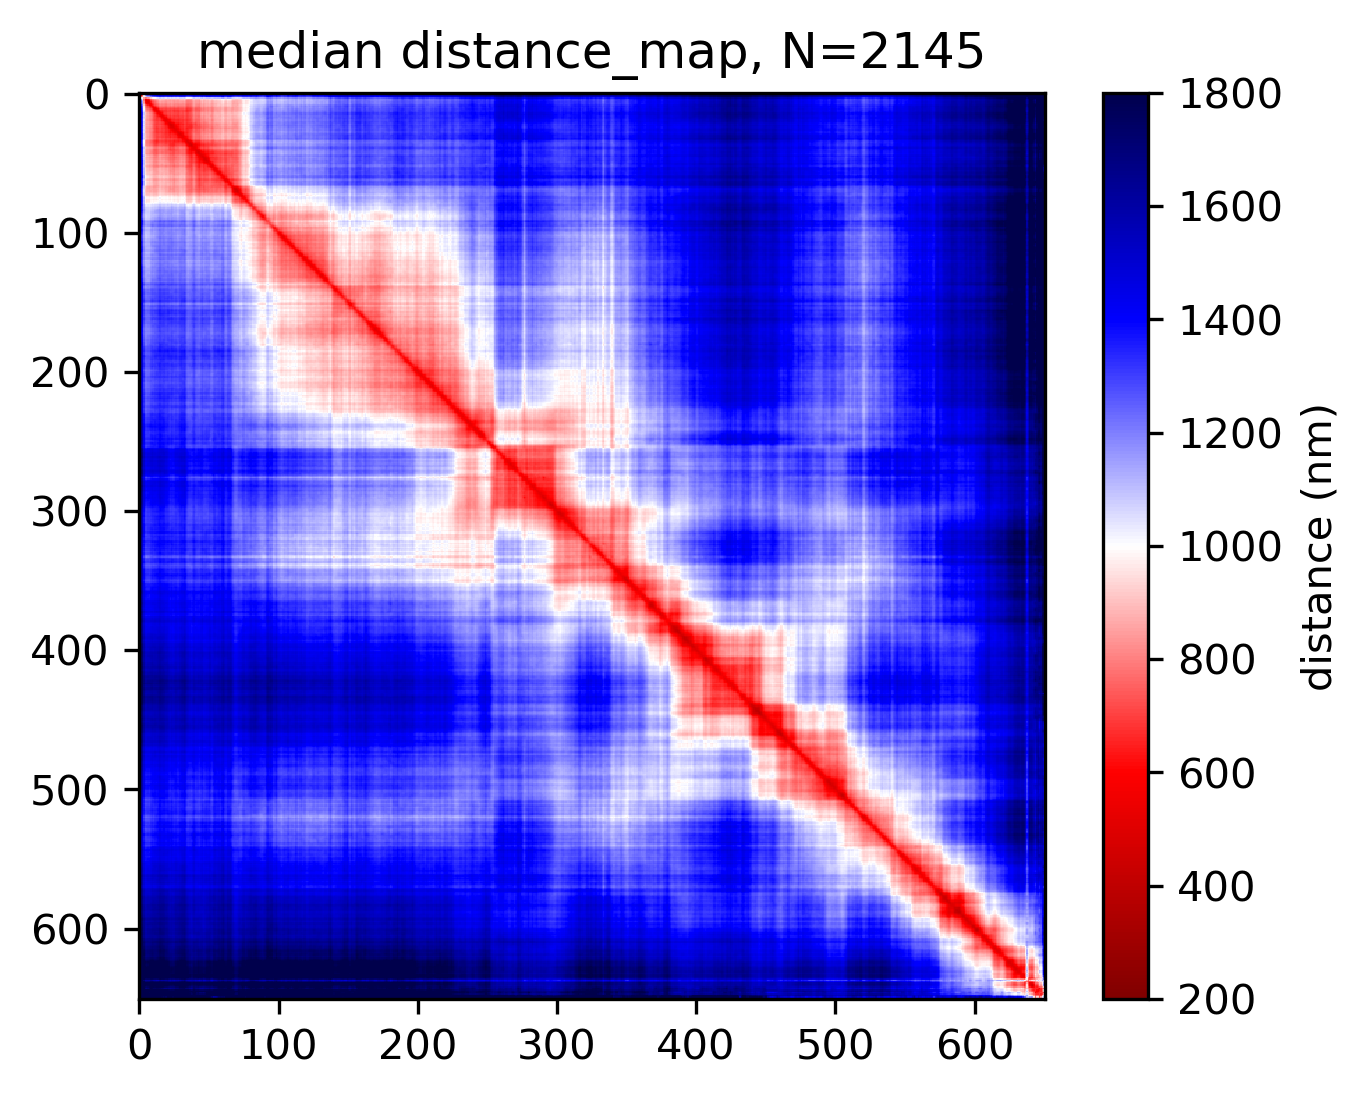

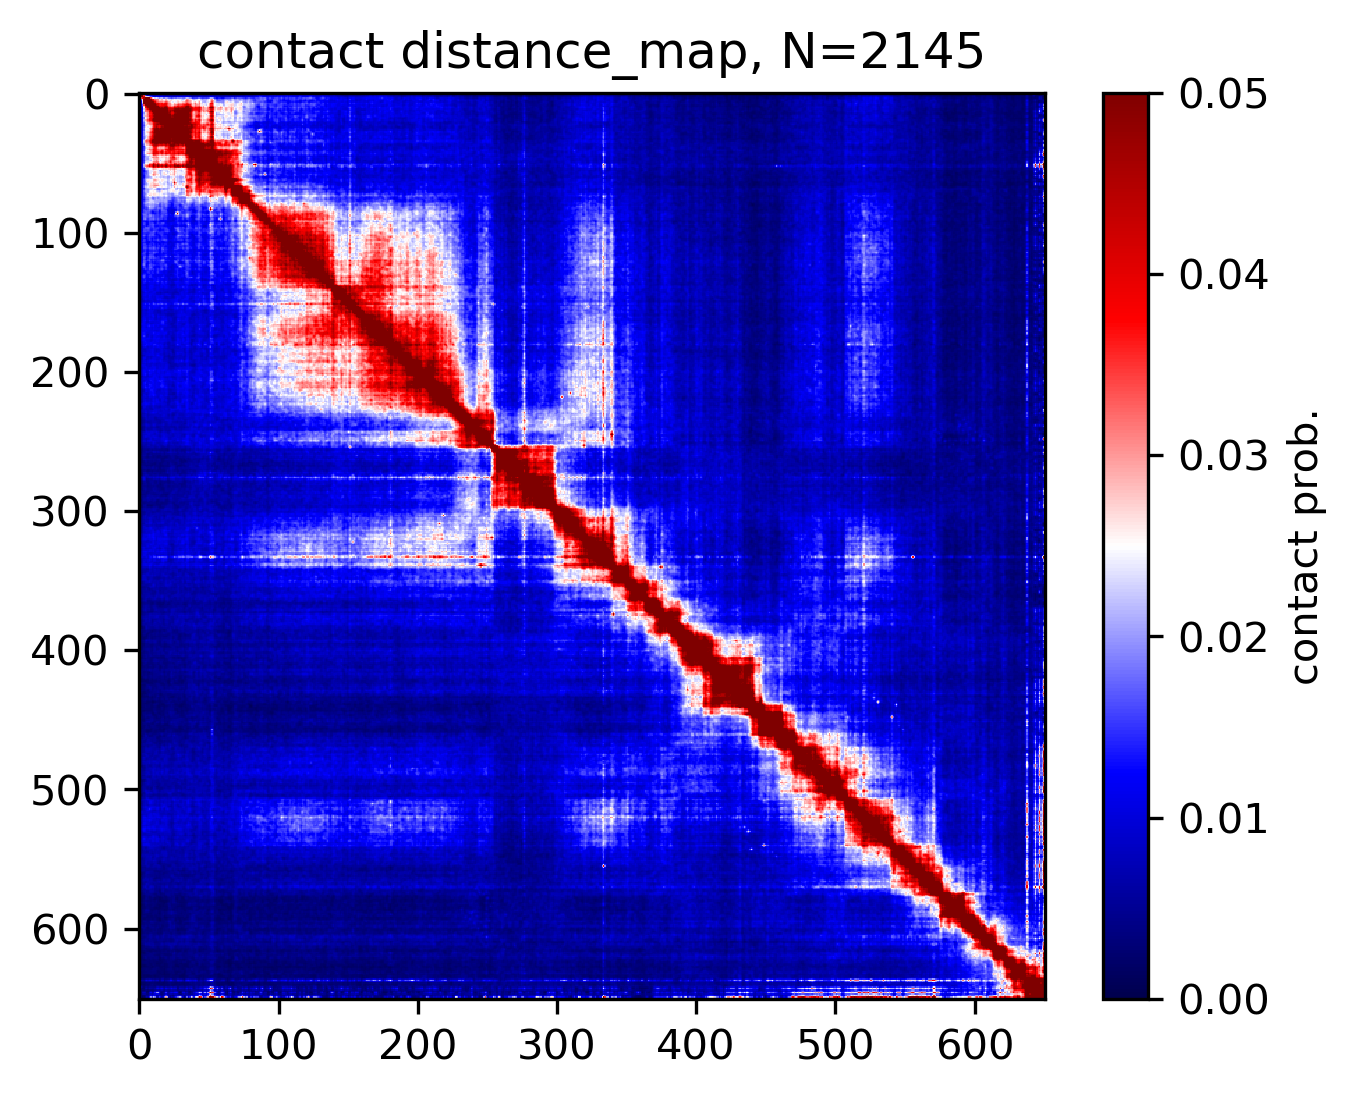

In [5]:
%matplotlib inline
gaussian_filter_size = 0.75
average_map, all_maps, failure_rate = lst._calculate_population_map('unique', 'EM', _max_loss_prob=0.25,
                                                                    _stat_type='median',_gfilt_size=gaussian_filter_size,
                                                                    _plot_limits=[200,1800], 
                                                                    _return_all_maps=True)
contact_map, _ = lst._calculate_population_map('unique', 'EM', _max_loss_prob=0.25,
                                               _stat_type='contact', _gfilt_size=gaussian_filter_size,
                                               _plot_limits=[0,0.05])

# Correlations to Hi-C

## load Hi-C

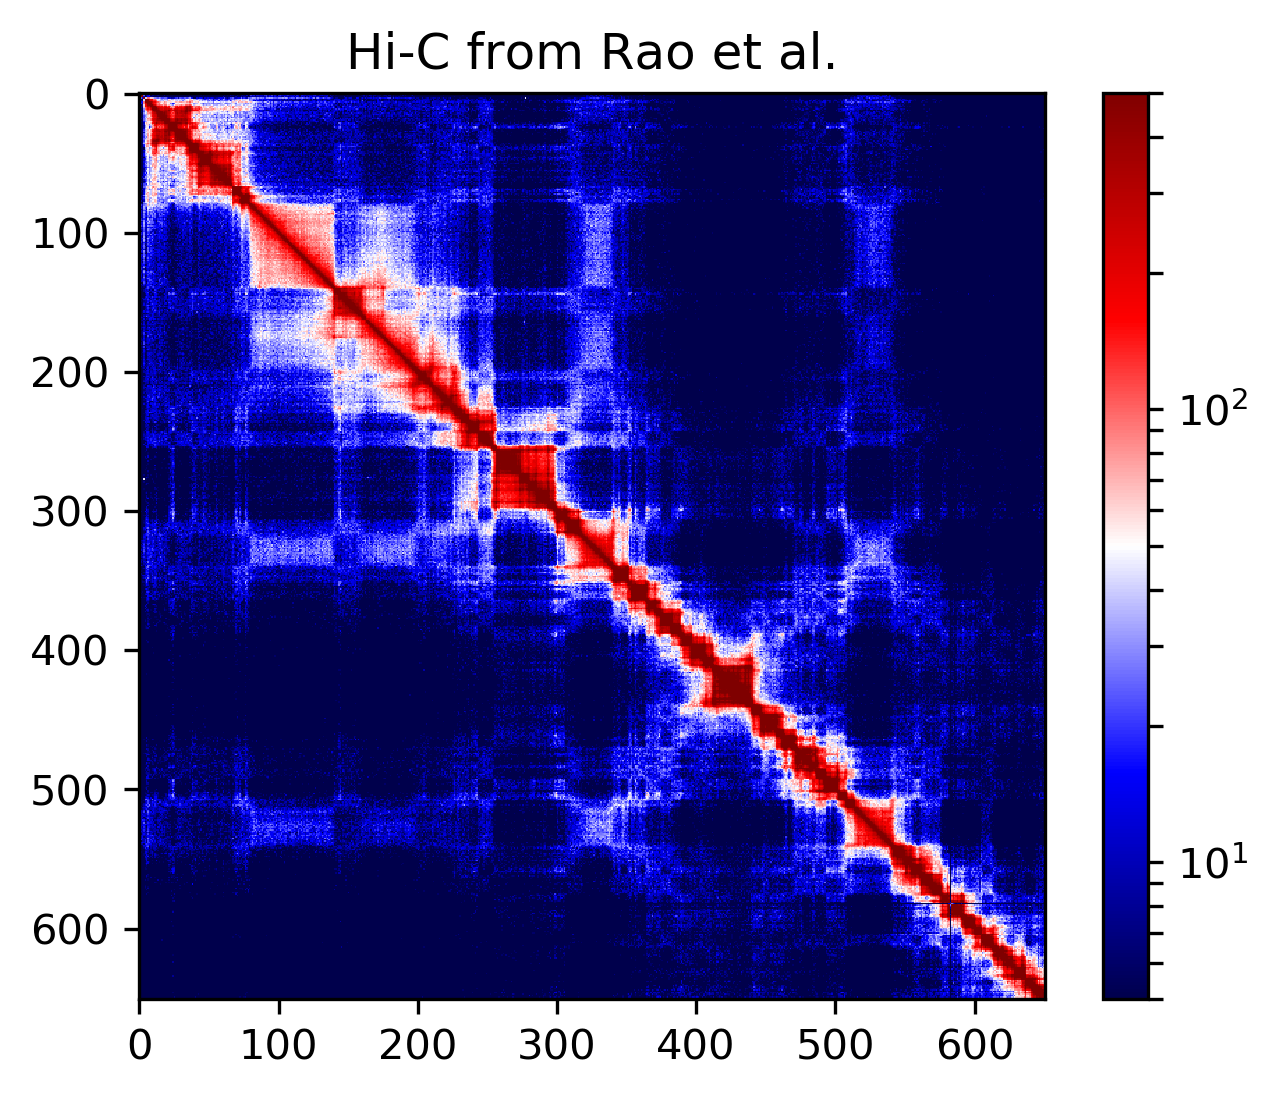

In [34]:
# save_folder
save_folder = lst.map_folder
# load hic
with np.load(r'E:\Users\puzheng\Documents\Hi-C\5x10_distmap.npz') as handle:
    hic_map = handle['distance_map']
# plot hic
import matplotlib
plt.figure(figsize=(5,4), dpi=300)
plt.title('Hi-C from Rao et al.')
plt.imshow(hic_map+0.0001, cmap='seismic', vmin=5, vmax=500, interpolation='nearest', 
          norm=matplotlib.colors.LogNorm(vmin=hic_map.min(), vmax=hic_map.max()))
plt.colorbar()
plt.savefig(os.path.join(save_folder, 'hic_seismic.png'), transparent=True)
plt.show()

## Hi-C vs. distance

In [40]:
region_success = failure_rate < 0.5

In [41]:
# r-square for distance
from scipy.stats import linregress, pearsonr
import matplotlib
k_sparse= np.triu(average_map[region_success][:,region_success], 1);
k_hic = np.triu(hic_map[region_success][:,region_success], 1);

kept = (k_sparse > 0) * (k_hic > 0) 
k_sparse = k_sparse[kept]
k_hic = k_hic[kept]

lr = linregress(np.log(k_sparse),-np.log(k_hic))
#lr = linregress(k_sparse,1/k_hic)
print(lr)
print('pearson correlation:', np.sqrt(lr.rvalue))
px = np.arange(np.min(k_sparse
                     ),np.max(k_sparse))
py = np.exp(-np.log(px) * lr.slope - lr.intercept)

LinregressResult(slope=5.2520991111871504, intercept=-39.371107567946957, rvalue=0.84705892319982634, pvalue=0.0, stderr=0.0075929020927472902)
pearson correlation: 0.920358040764


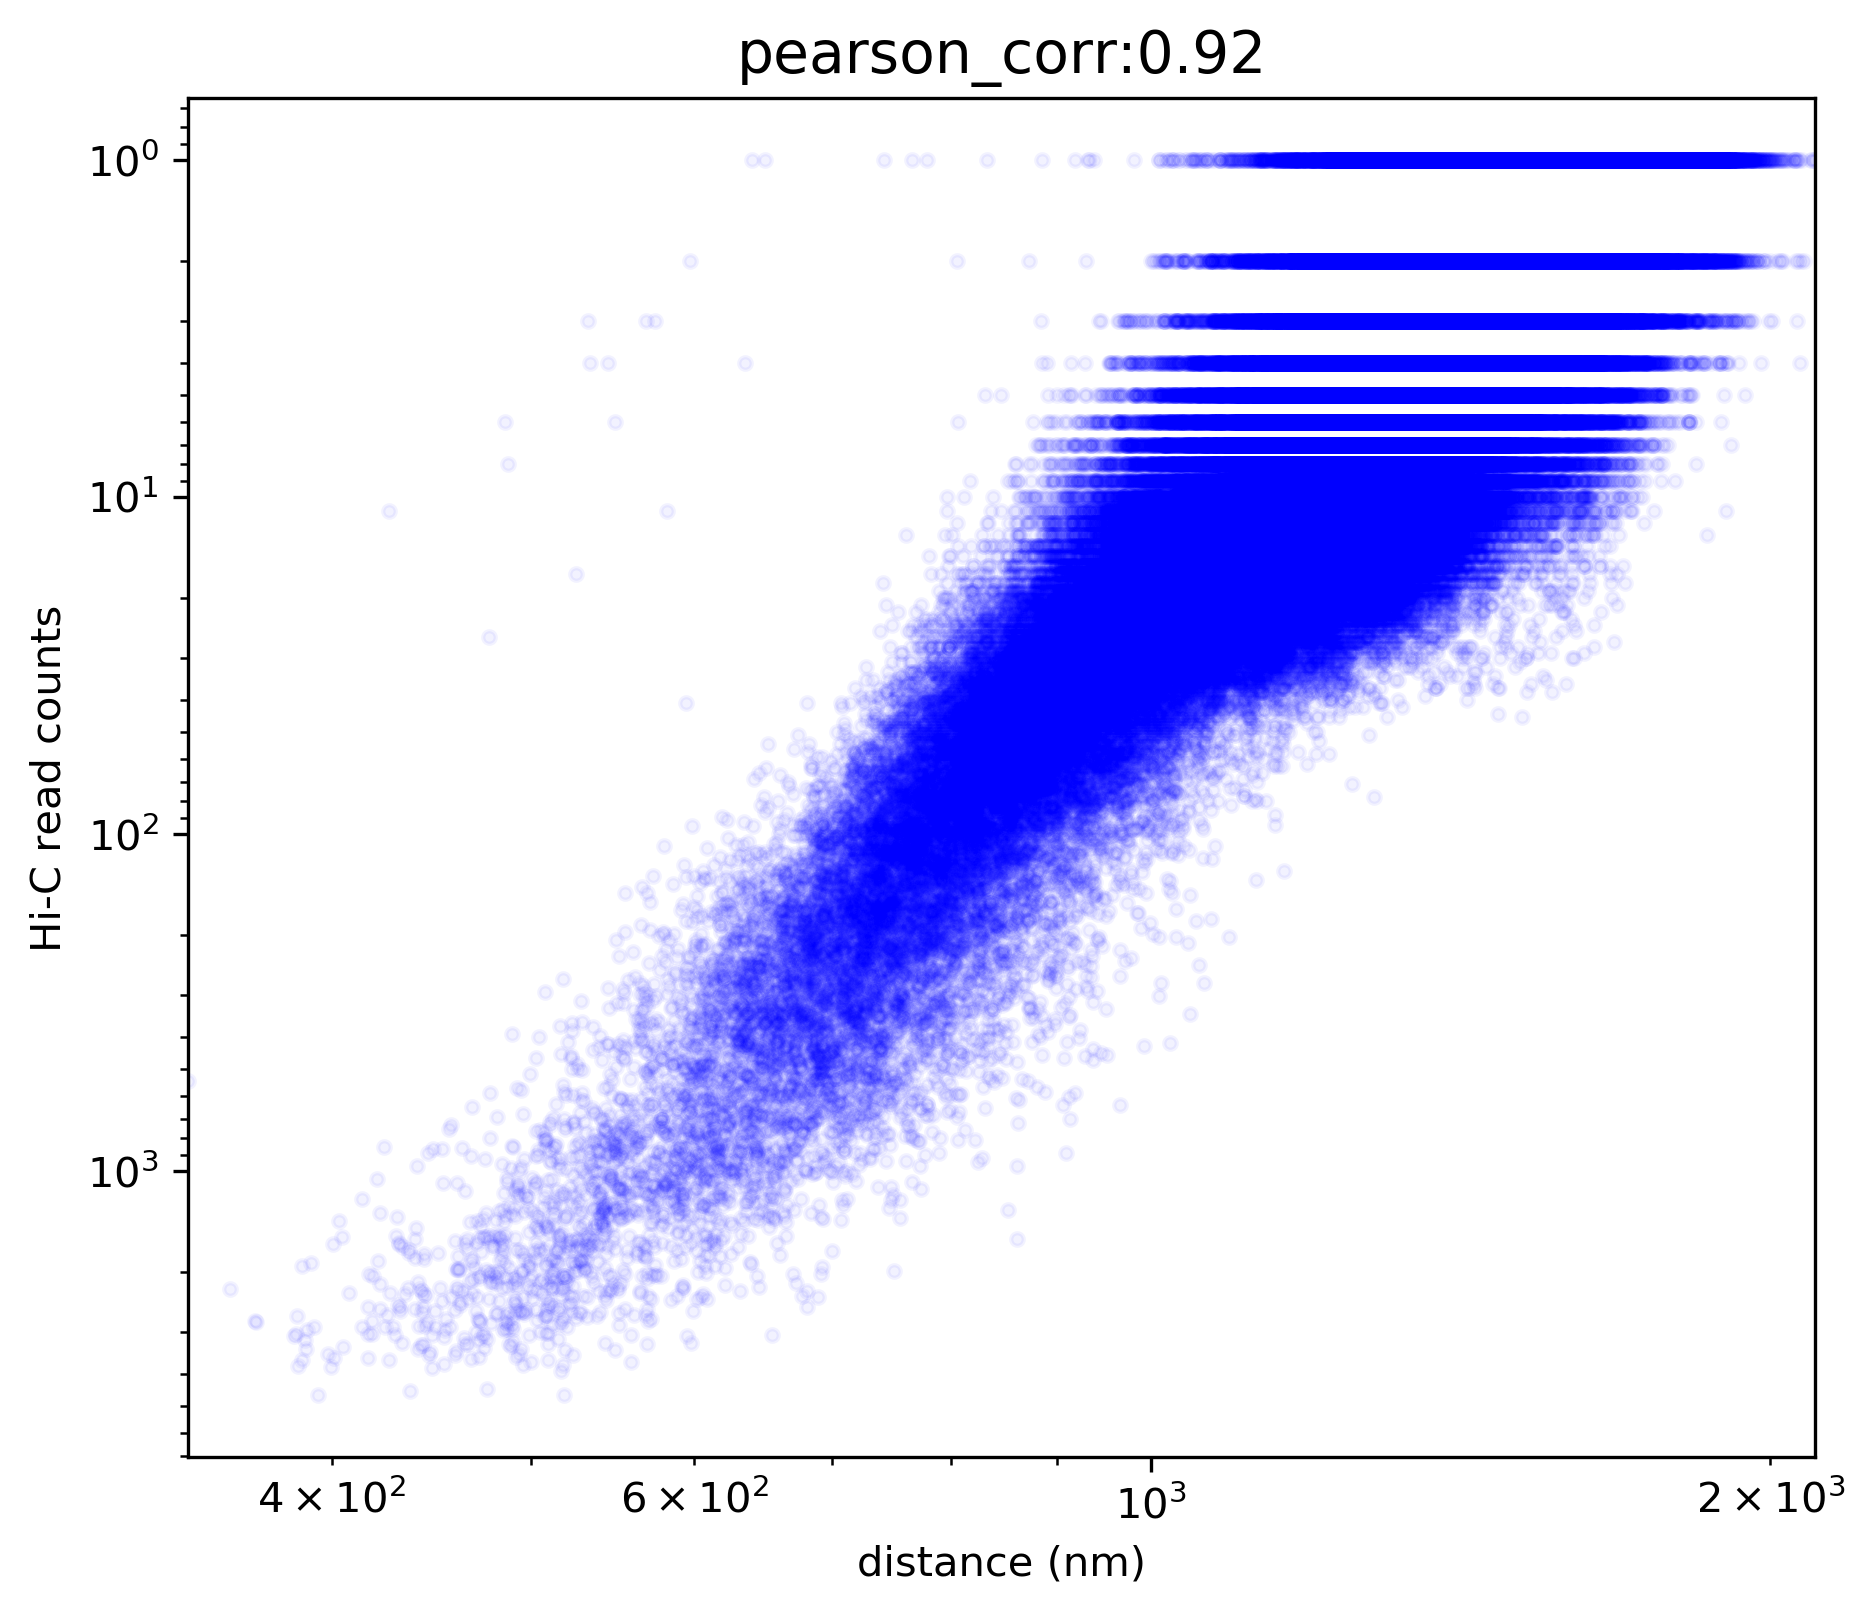

In [42]:
plt.figure(figsize=(7,6), dpi=300)
plt.plot(k_sparse, k_hic,'b.', alpha=0.05)
#plt.plot(px, py, 'r')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Hi-C read counts')
plt.xlabel('distance (nm)')
plt.gca().invert_yaxis()
plt.xlim([np.min(k_sparse), np.max(k_sparse)])
plt.title(f"pearson_corr:{np.around(np.sqrt(lr.rvalue),3)}", fontsize=14)
plt.show()

## Hi-C vs. contact

In [43]:
# r-square

k_contact = np.ravel(np.triu(contact_map[region_success][:,region_success],1))
k_hic = np.ravel(np.triu(hic_map[region_success][:,region_success], 1))

kept = (k_contact > 0) * (k_hic > 0) 
k_contact = k_contact[kept]
k_hic = k_hic[kept]

#lr = linregress(np.log(k_sparse),np.log(k_hic))
lr = linregress(k_contact,k_hic)

print(lr)
print('pearson correlation:', np.sqrt(lr.rvalue))
px = np.arange(np.min(k_sparse
                     ),np.max(k_sparse))
py = np.exp(-np.log(px) * lr.slope - lr.intercept)

LinregressResult(slope=7830.421886521659, intercept=-73.83503014895436, rvalue=0.69880641998032811, pvalue=0.0, stderr=18.468181126942671)
pearson correlation: 0.835946421716


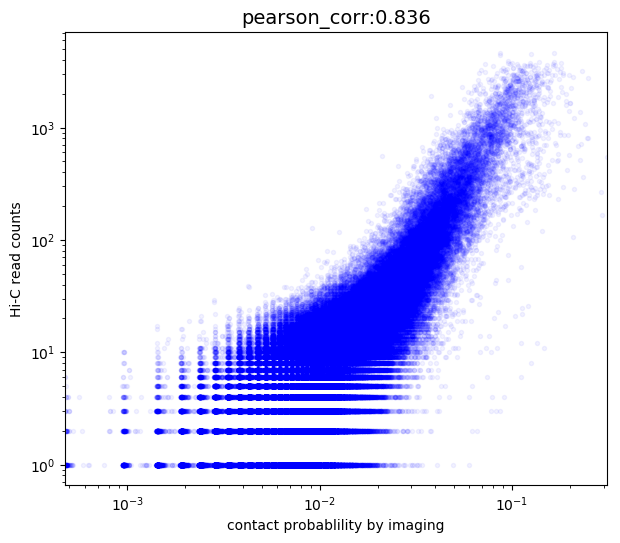

In [44]:
plt.figure(figsize=(7,6), dpi=100)
plt.plot(k_contact,k_hic,'b.', alpha=0.05)
#plt.plot(px, py, 'r')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Hi-C read counts')
plt.xlabel('contact probablility by imaging')
plt.xlim([np.min(k_contact), np.max(k_contact)])


plt.title(f"pearson_corr:{np.around(np.sqrt(lr.rvalue),3)}", fontsize=14)
plt.show()

# Genmoic Scaling

In [8]:
genomic_positions = get_img_info.Load_Region_Positions(lst.analysis_folder)
mid_positions = np.array([genomic_positions[_uid]['midpoint'] for _uid in lst.cells[0].unique_ids])

from scipy.spatial.distance import pdist, squareform
genomic_distance_map = squareform(pdist(mid_positions[:,np.newaxis]))

- Importing csv file: Y:\20190305_IMR90_CTP05_DNA-FISH\Analysis\Region_Positions.csv
- header: ['region', 'chr', 'start', 'end', 'midpoint']
-- 651 genomic regions loaded!


In [22]:
normalization_mat = np.exp(np.log(genomic_distance_map) * lr.slope + lr.intercept)
for _i in range(len(normalization_mat)):
    normalization_mat[_i,_i] = 0
# save
np.save(os.path.join(lst.analysis_folder, 'normalization_matrix'), normalization_mat)

E:\Users\puzheng\AppData\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


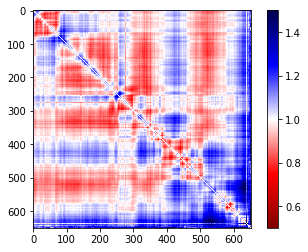

In [19]:
plt.figure()
plt.imshow(average_map / normalization_mat, cmap='seismic_r', vmin=0.5, vmax=1.5)
plt.colorbar()
plt.show()

In [11]:
genomic_distance_vector = np.ravel(np.triu(genomic_distance_map, 1))
median_distance_vector = np.ravel(np.triu(average_map, 1))

kept = (genomic_distance_vector > 0) * (median_distance_vector > 0)

lr = scipy.stats.linregress(np.log(genomic_distance_vector[kept]), np.log(median_distance_vector[kept]))
#lr = linregress(k_sparse,1/k_hic)
print(lr)
print('pearson correlation:', np.sqrt(lr.rvalue))


LinregressResult(slope=0.17939011607276231, intercept=4.2891270830260257, rvalue=0.8761560276561986, pvalue=0.0, stderr=0.00021456498422126331)
pearson correlation: 0.936032065506


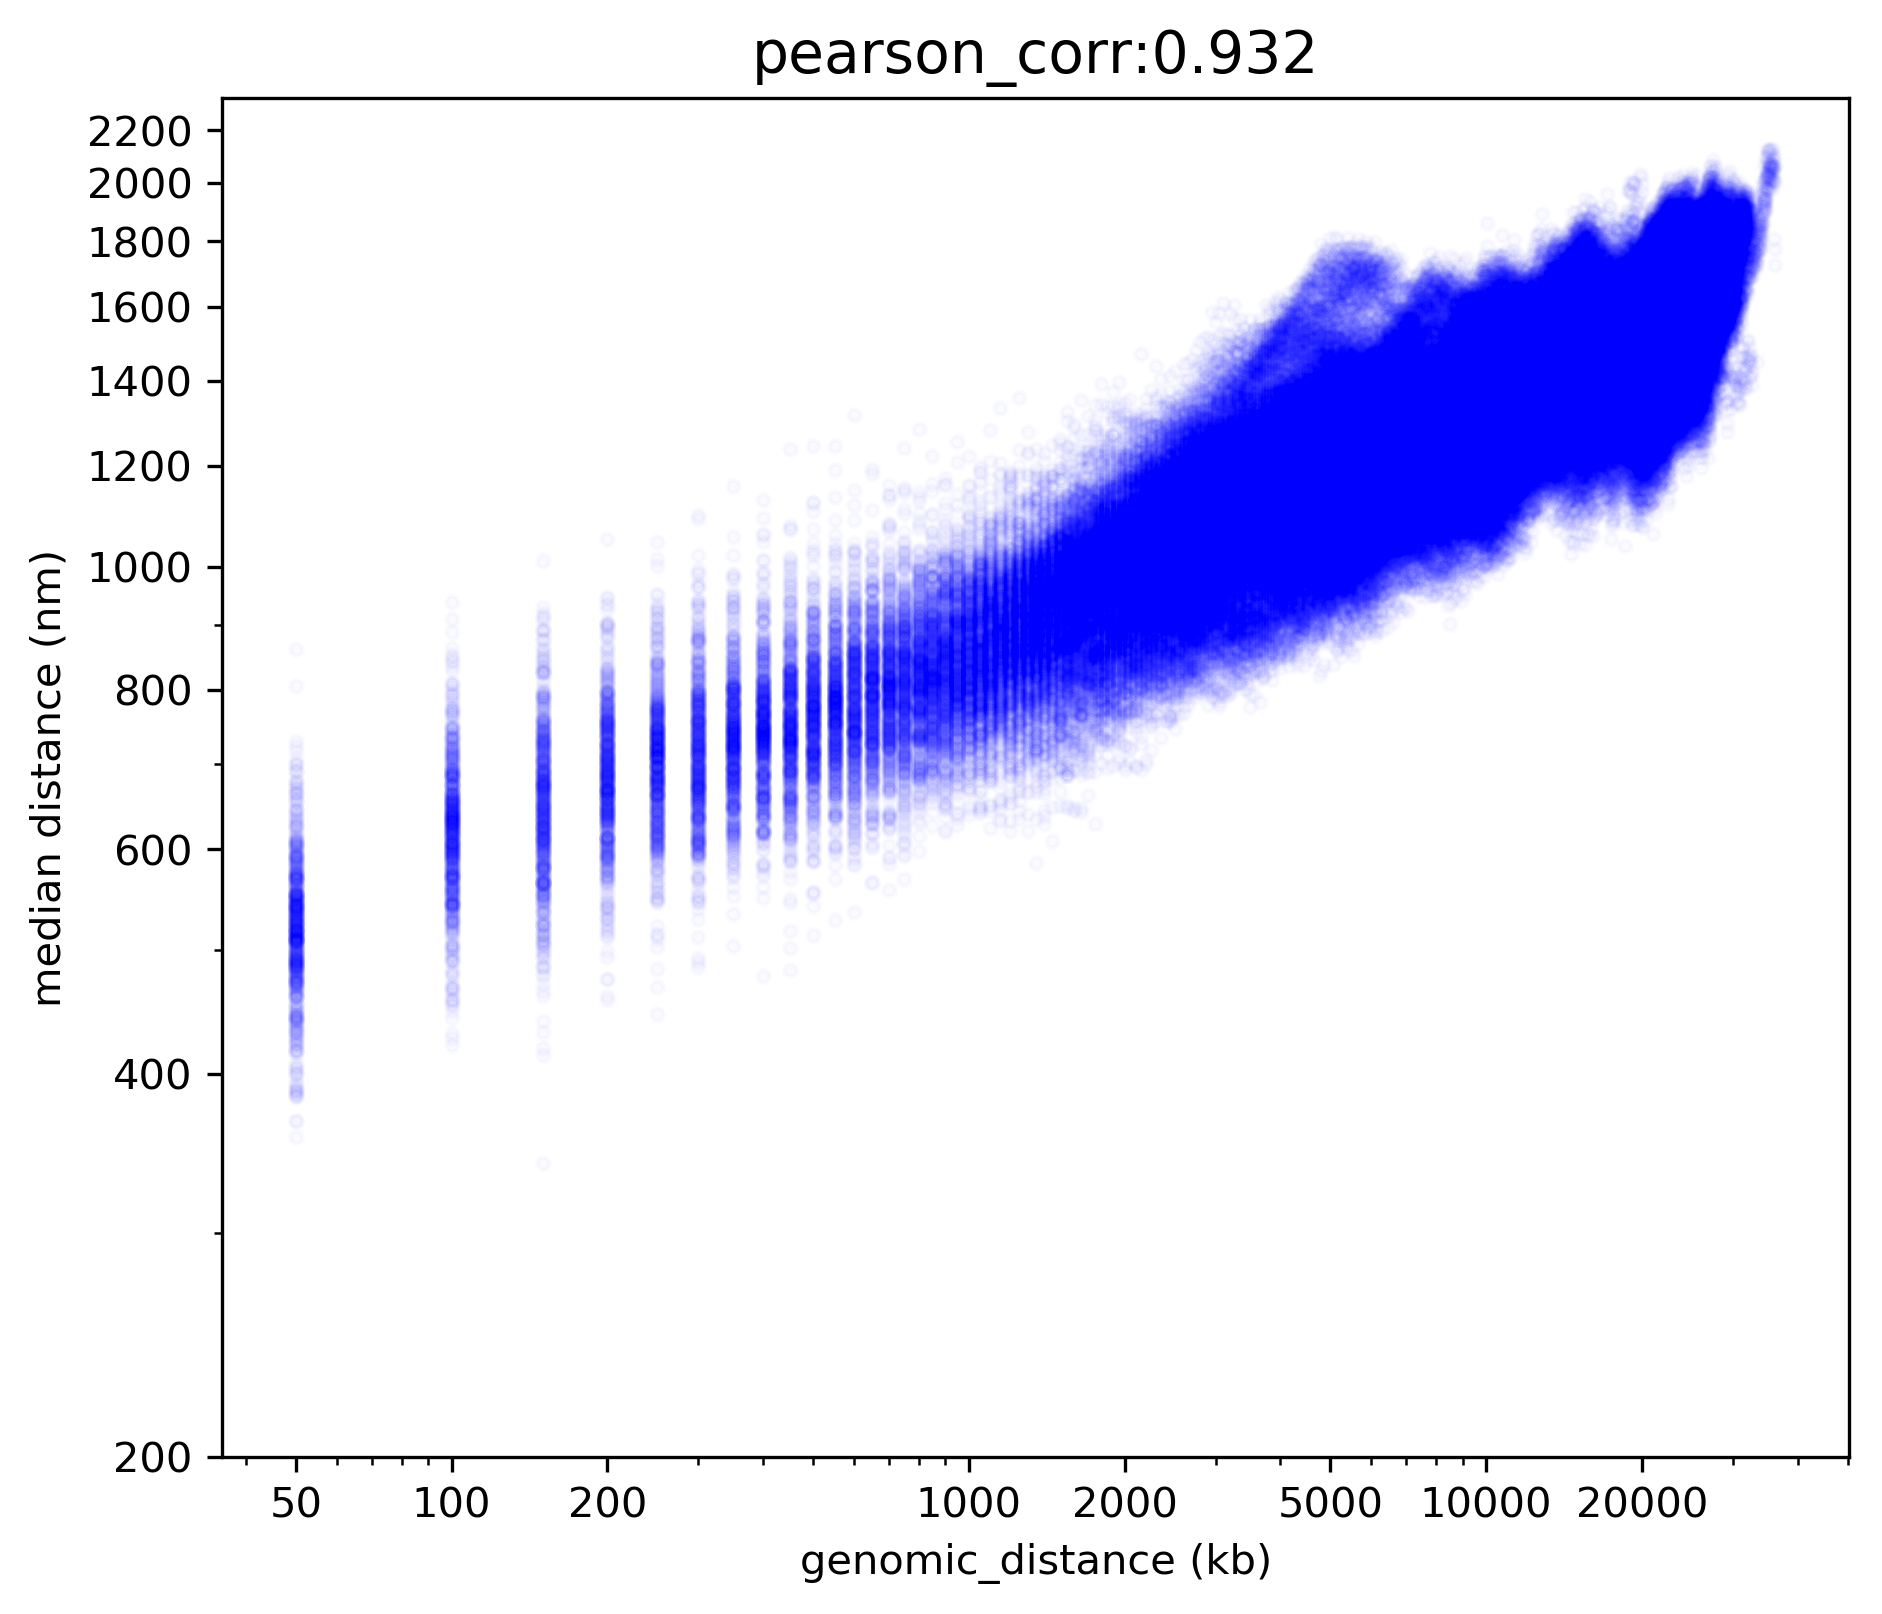

In [47]:
plt.figure(figsize=(7,6), dpi=300)
plt.plot(genomic_distance_vector/1e3, median_distance_vector, 'b.', alpha=0.02)
#plt.plot(px, py, 'r')
plt.xscale('log')
plt.yscale('log')

plt.xticks([50,100,200,1000,2000,5000,10000,20000], [50,100,200,1000,2000,5000,10000,20000])
plt.xlabel('genomic_distance (kb)')
plt.yticks(np.arange(200, 2400, 200), np.arange(200, 2400, 200))
plt.ylabel('median distance (nm)')

#plt.gca().invert_yaxis()
#plt.xlim([np.min(k_sparse), np.max(k_sparse)])
plt.title(f"pearson_corr:{np.around(np.sqrt(lr.rvalue),3)}", fontsize=14)
plt.show()

# Call domains

In [149]:
reload(domain_tools)
reload(DomainTools)
domain_starts = lst._batch_domain_calling('unique', _method='local', _num_threads=22)

+ Start local calling unique domains in batch
+++ skip fov:3, cell:0 having local_domain_starts
+++ skip fov:3, cell:1 having local_domain_starts
+++ skip fov:3, cell:2 having local_domain_starts
+++ skip fov:3, cell:3 having local_domain_starts
+++ skip fov:3, cell:4 having local_domain_starts
+++ skip fov:3, cell:5 having local_domain_starts
+++ skip fov:3, cell:6 having local_domain_starts
+++ skip fov:3, cell:7 having local_domain_starts
+++ skip fov:3, cell:8 having local_domain_starts
+++ skip fov:3, cell:9 having local_domain_starts
+++ skip fov:3, cell:10 having local_domain_starts
+++ skip fov:3, cell:11 having local_domain_starts
+++ skip fov:3, cell:12 having local_domain_starts
+++ skip fov:3, cell:13 having local_domain_starts
+++ skip fov:3, cell:14 having local_domain_starts
+++ skip fov:3, cell:15 having local_domain_starts
+++ skip fov:3, cell:16 having local_domain_starts
+++ skip fov:3, cell:17 having local_domain_starts
++ start multi-processing local calling domain

In [125]:
# summarize boundaries and CTCF/cohesin
bd_list = []
for _cell in lst.cells:
    if hasattr(_cell, 'iterative_domain_starts'):
        for _starts in getattr(_cell, 'iterative_domain_starts'):
            bd_list.append(_starts)
    else:
        print(_cell.fov_id, _cell.cell_id)
all_bds = []
for _bds in bd_list:
    all_bds += list(_bds)

ref_folder = r'Z:\References'
ctcf_list = get_img_info.Load_ChIP_Data(ref_folder, 'CTCF')
rad21_list = get_img_info.Load_ChIP_Data(ref_folder, 'RAD21')
region_dic = get_img_info.Load_Region_Positions(ref_folder)
reg_ids = np.array(list(region_dic.keys()), dtype=np.int)
ctcf_signal = np.zeros(len(region_dic.keys()))
rad21_signal = np.zeros(len(region_dic.keys()))
for _dic in ctcf_list:
    if 'region' in _dic and int(_dic['region']) in reg_ids:
        ctcf_signal[np.where(reg_ids==int(_dic['region']))[0]] += _dic['fold']
for _dic in rad21_list:
    if 'region' in _dic and int(_dic['region']) in reg_ids:
        rad21_signal[np.where(reg_ids==int(_dic['region']))[0]] += _dic['fold']

- Importing csv file: Z:\References\CTCF_ChIP-Seq_chr21.csv
- header: ['chr', 'start', 'end', 'midpoint', 'fold', 'region']
-- 452 CTCF ChIP-Seq peaks loaded!
- Importing csv file: Z:\References\RAD21_ChIP-Seq_chr21.csv
- header: ['chr', 'start', 'end', 'midpoint', 'fold', 'region']
-- 442 RAD21 ChIP-Seq peaks loaded!
- Importing csv file: Z:\References\Region_Positions.csv
- header: ['region', 'chr', 'start', 'end', 'midpoint']
-- 651 genomic regions loaded!


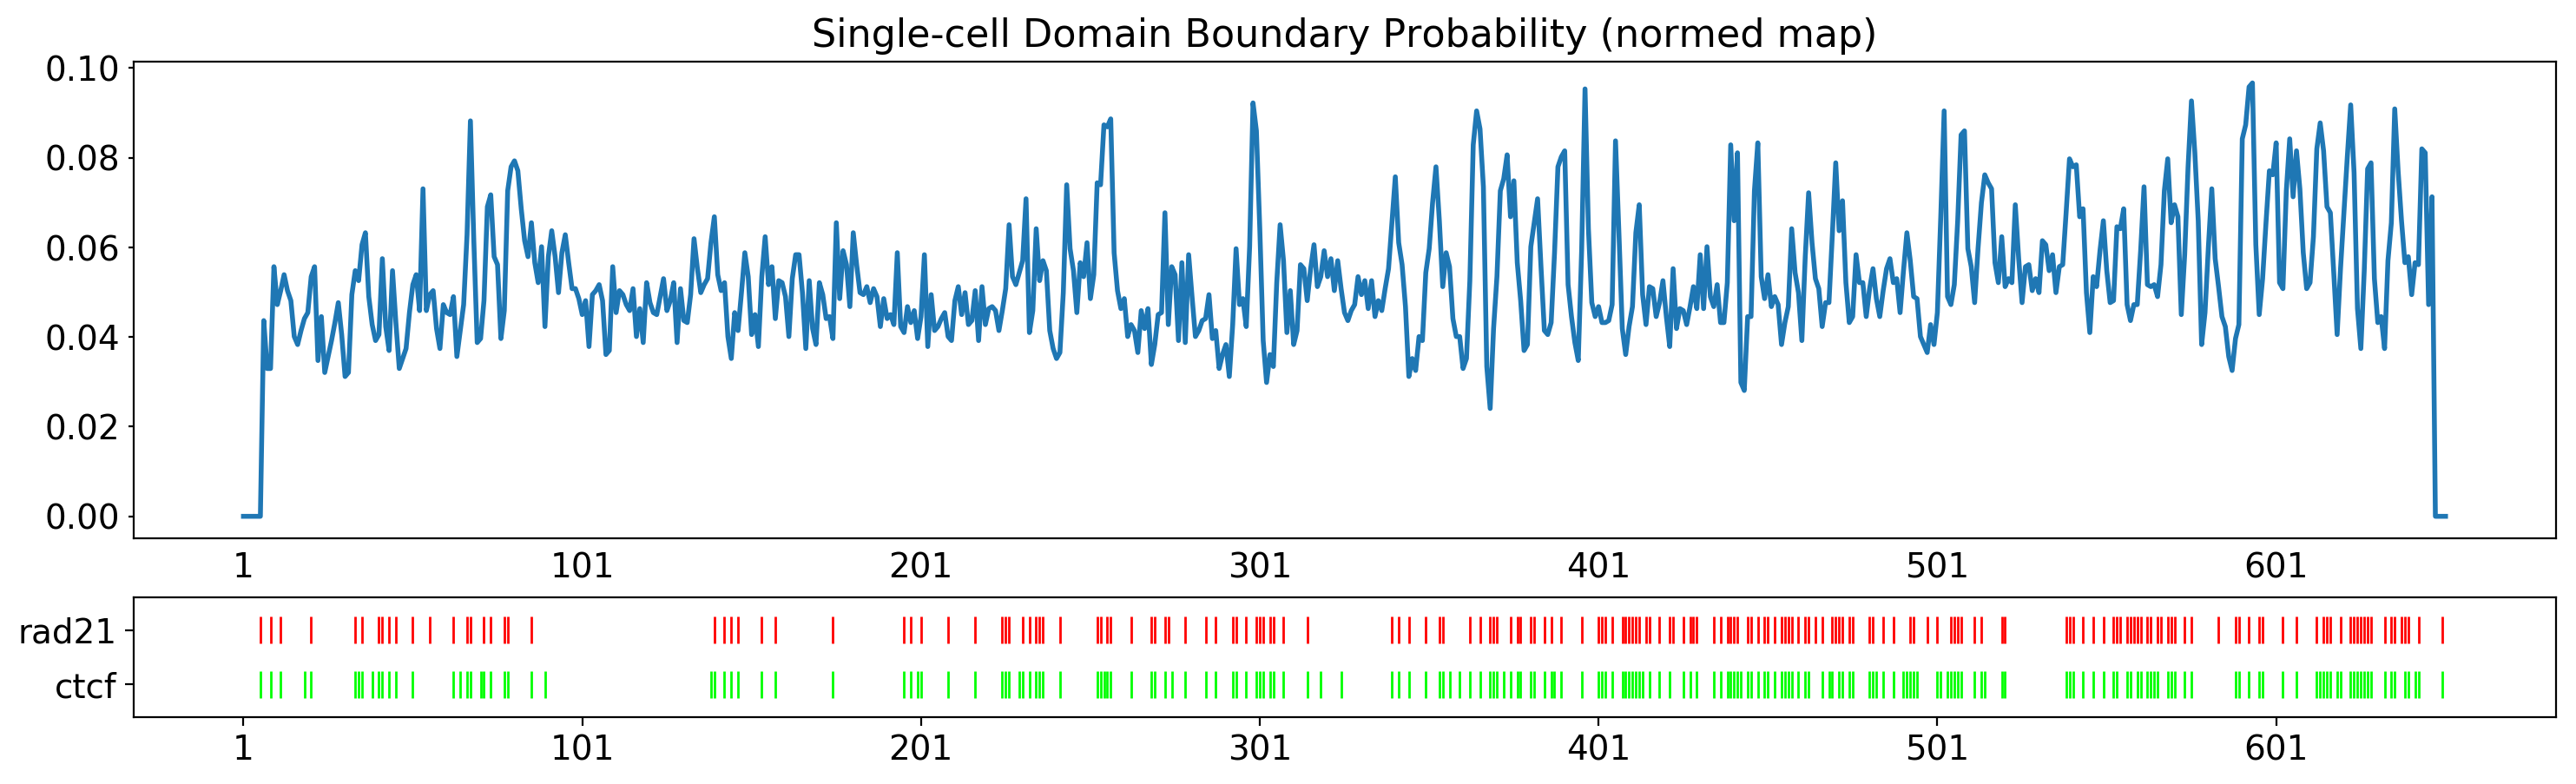

In [137]:
_uids, _ucounts = np.unique(all_bds, return_counts=True)
_ux = np.arange(len(_spots))
_uy = np.zeros(len(_ux))
_uy[_uids] = _ucounts / len(bd_list)
_uy[0] = 0

fig = plt.figure(figsize=(18, 5), dpi=200)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, :],xticklabels=[])
main_ax.plot(_ux+1, _uy, linewidth=2)
main_ax.set_title('Single-cell Domain Boundary Probability (normed map)', fontsize=16)
main_ax.tick_params(bottom=False, labelsize=14, length=2)
#main_ax.xaxis.set_ticklabels([])
#y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
label_ax = fig.add_subplot(grid[-1, :], sharex=main_ax)
signals = [np.where(ctcf_signal>50)[0]+1, np.where(rad21_signal>50)[0]+1]
label_ax.eventplot(signals, lineoffsets=[0,1],linelengths=0.5, linewidths=1, colors=np.array([[0, 1, 0],[1, 0, 0]]))
label_ax.set_yticks([0,1])
label_ax.set_yticklabels(['ctcf', 'rad21'], fontsize=14)
label_ax.set_xticks(np.arange(1,651, 100))
label_ax.set_xticklabels(np.arange(1,651, 100), fontsize=14)
plt.savefig(r'X:\Pu\190415-figures\iterative_boundary_probability.png', transparent=True)

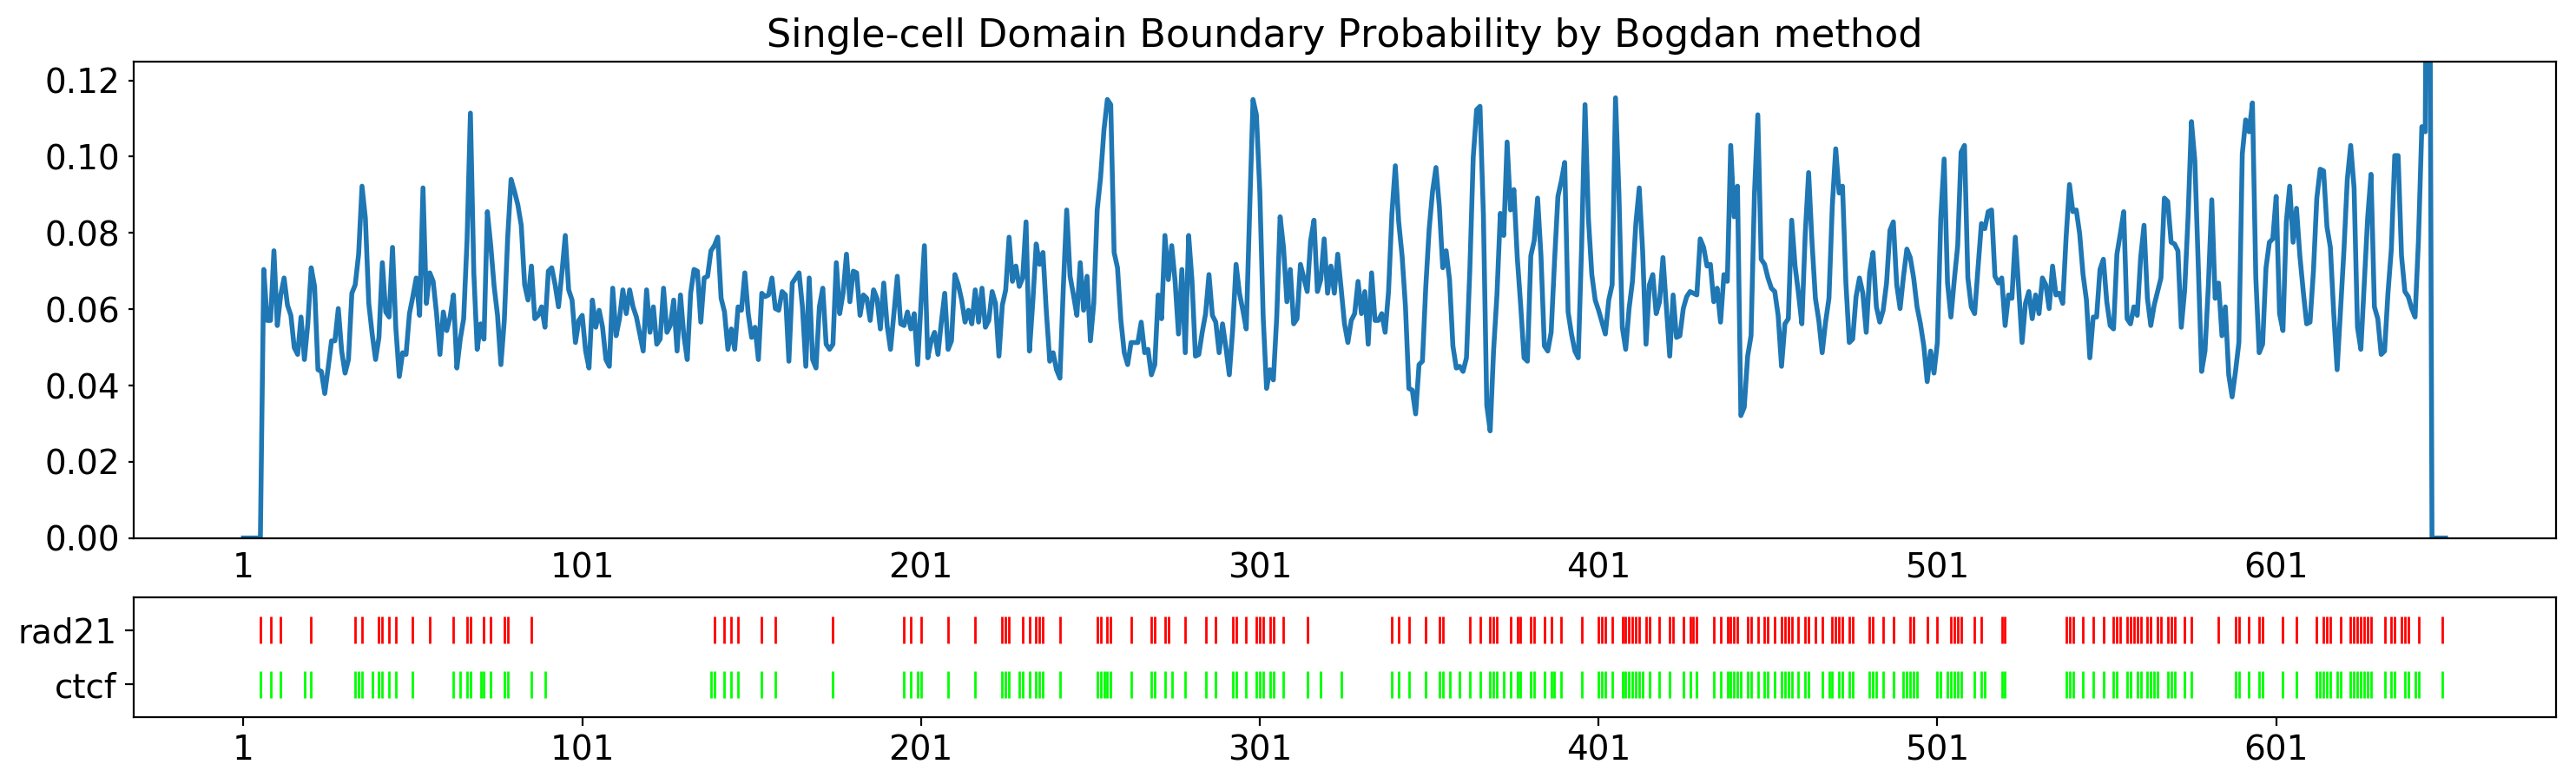

In [155]:
local_bd_list = []
for _cell in lst.cells:
    if hasattr(_cell, 'local_domain_starts'):
        for _starts in getattr(_cell, 'local_domain_starts'):
            local_bd_list.append(_starts)
    else:
        print(_cell.fov_id, _cell.cell_id)
local_bds = []
for _bds in local_bd_list:
    local_bds += list(_bds)

_uids, _ucounts = np.unique(local_bds, return_counts=True)
_ux = np.arange(len(_spots))
_uy = np.zeros(len(_ux))
_uy[_uids] = _ucounts / len(local_bd_list)
_uy[0] = 0

fig = plt.figure(figsize=(18, 5), dpi=200)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, :],xticklabels=[])
main_ax.plot(_ux+1, _uy, linewidth=2)
main_ax.set_title('Single-cell Domain Boundary Probability by Bogdan method', fontsize=16)
main_ax.tick_params(bottom=False, labelsize=14, length=2)
main_ax.set_ylim([0,0.125])
#main_ax.xaxis.set_ticklabels([])
#y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
label_ax = fig.add_subplot(grid[-1, :], sharex=main_ax)
signals = [np.where(ctcf_signal>50)[0]+1, np.where(rad21_signal>50)[0]+1]
label_ax.eventplot(signals, lineoffsets=[0,1],linelengths=0.5, linewidths=1, colors=np.array([[0, 1, 0],[1, 0, 0]]))
label_ax.set_yticks([0,1])
label_ax.set_yticklabels(['ctcf', 'rad21'], fontsize=14)
label_ax.set_xticks(np.arange(1,651, 100))
label_ax.set_xticklabels(np.arange(1,651, 100), fontsize=14)
plt.savefig(r'X:\Pu\190415-figures\local_boundary_probability.png', transparent=True)

# Save some chromosomes for later analysis

In [26]:
kept_info = []
for _cell in lst.cells:
    if len(_cell.chrom_coords) == 2:
        if np.linalg.norm(_cell.chrom_coords[0] - _cell.chrom_coords[1]) > 40:
            for _cid, _chrom_coord in enumerate(_cell.chrom_coords):
                save_dic = {'fov_id': _cell.fov_id,
                            'cell_id': _cell.cell_id,
                            'chrom_id': _cid,
                            'chrom_coord': _chrom_coord,
                            'distance_map': _cell.EM_unique_distance_map[_cid]
                           }
                kept_info.append(save_dic)

In [27]:
len(kept_info)

1294

In [29]:
save_filename = os.path.join(lst.analysis_folder, 'selected_distmaps.pkl')
pickle.dump(kept_info, open(save_filename, 'wb'))

# match RNA burst info

## create RNA list

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 33
- Number of field of views: 60
- Importing csv file: Y:\20190302_IMR90_CTP05_intronFISH\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- Importing csv file: Y:\20190302_IMR90_CTP05_intronFISH\Analysis\RNA_Info.csv
- header: ['RNA_id', 'gene_name', 'chr', 'strand', 'start', 'end', 'midpoint']
-- 93 RNA information loaded!
- Importing csv file: Y:\20190302_IMR90_CTP05_intronFISH\Analysis\Region_Positions.csv
- header: ['region', 'chr', 'start', 'end', 'midpoint']
-- 651 genomic regions loaded!
33 folders are found according to color-usage annotation.
+ Create Cell_Data objects for field of view: [29]
++ preparing variables
++ choose dapi images from folder: Y:\20190302_IMR90_CTP05_intronFISH\H0R0.
+ Load segmentation for fov 29
-- directly load segmentation result from:Y:\20190302_IMR90_CTP05_intronFISH\Analysis\segmentation\Co

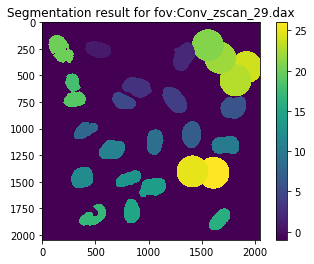

+ Create cell_data objects, num_of_cell:26
+ Creating 26 cells with 24 threads.


In [6]:
# initialize cell-list
param = {'data_folder':r'Y:\20190302_IMR90_CTP05_intronFISH',
         'experiment_type':'RNA',
         'save_folder':r'V:\20190302_intronicRNA_unique',
         'num_threads': 24,
         'correction_folder':r'I:\Corrections',
         };
rna_lst = ia.classes.Cell_List(param, _chosen_fovs=[], _exclude_fovs=[])
# create cells
rna_lst._create_cells_fov(fov_ids, _drift_size=370, _coord_sel=[400,400], _load_segmentation=True,
                          _load_exist_info=True)

In [8]:
lst._merge_RNA_to_DNA(rna_lst, _merge_type='cell_info', _match_dic=None,
                      _load_in_ram=True, _save_to_file=True, _overwrite=True)

+ Start merging RNA cell_info into cell list with cells:26
++ 26 cells are going to merge with RNA info!
++ 0 cells are skipped for merging.
++ start multiprocessing merging RNA to DNA.
++ update cell_datas into cell_list
++ total time for merging RNA to DNA: 24.774452686309814


In [ ]:
## 

## get RNA spot intensity profile

+ Get intensity information for rna-unique given 1238 cells
++ start acquiring rna-unique intensities for different regions.


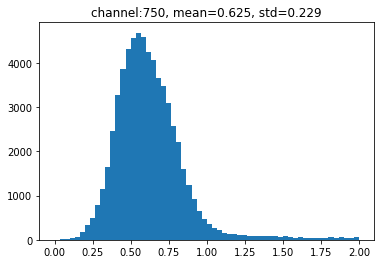

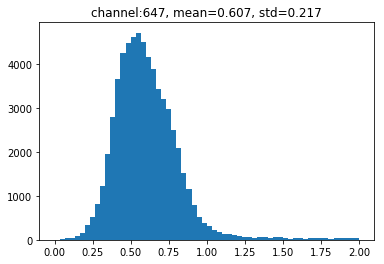

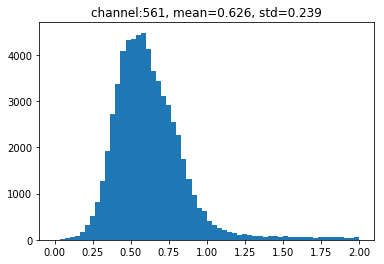

++ save rna-unique intensity info into file:I:\Pu_temp\DNA_unique\rna-unique_spot_intensity.pkl


In [16]:
# get RNA background intensity 
id_gaussian = lst._get_intensity_stats('rna-unique', _type_marker_dic={'rna-unique':'u'}, _gaussian_fitting_th=2,
                                       _make_plot=True, _overwrite=False)

In [ ]:
intensities = {_i:[] for _i in getattr(lst.cells[0],'rna-unique_ids')}
for _cell in lst.cells:
    for _id, _spots in zip(getattr(_cell, 'rna-unique_ids'), getattr(_cell, 'rna-unique_spots')):
        intensities[_id].append(_spots)
rna_file = os.path.join(lst.analysis_folder, 'rna_intensities.pkl')
pickle.dump(intensities, open(rna_file, 'wb'))

## convert to pvalue

In [5]:
# get p values
pvals_id, pvals_cell = lst._p_value_filter('rna-unique', _ref_dist_params=None, _pval_th=[1e-5, 1e-3])

+ calculate p-value for gaussian of rna-unique given 1238 cells
++ acquire param_dic from _get_intensity_stats:
+ Get intensity information for rna-unique given 1238 cells
++ directly load rna-unique intensity from file:
   I:\Pu_temp\DNA_unique\rna-unique_spot_intensity.pkl
+++ 0 has been processed.
+++ 100 has been processed.
+++ 200 has been processed.
+++ 300 has been processed.
+++ 400 has been processed.
+++ 500 has been processed.
+++ 600 has been processed.
+++ 700 has been processed.
+++ 800 has been processed.
+++ 900 has been processed.
+++ 1000 has been processed.
+++ 1100 has been processed.
+++ 1200 has been processed.


## dump some info for future analysis

In [42]:
lst._load_cells_from_files('cell_info', _load_attrs=['EM_picked_unique_spots'])
lst._load_cells_from_files('distance_map', _distmap_data='unique', _distmap_pick='EM')
chrom_profiles = []
distmaps = []
picked_spots = []
for _p_cell,_cell in zip(pvals_cell,lst.cells):
    for _chr, _distmap, _spots in zip(_p_cell, getattr(_cell, 'EM_unique_distance_map'),getattr(_cell, 'EM_picked_unique_spots')):
        if len(_chr) == 93:
            _pf = np.array([max(v) for k,v in _chr.items()], dtype=np.int)
            chrom_profiles.append(_pf)
            distmaps.append(_distmap)
            picked_spots.append(_spots)
# dump these profiles
pickle.dump(chrom_profiles, open(os.path.join(lst.save_folder, 'chrom_profiles.pkl'),'wb'))
pickle.dump(distmaps, open(os.path.join(lst.save_folder, 'distmaps.pkl'),'wb'))
pickle.dump(picked_spots, open(os.path.join(lst.save_folder, 'picked_spots.pkl'),'wb'))

## convert to on-off profile and plot

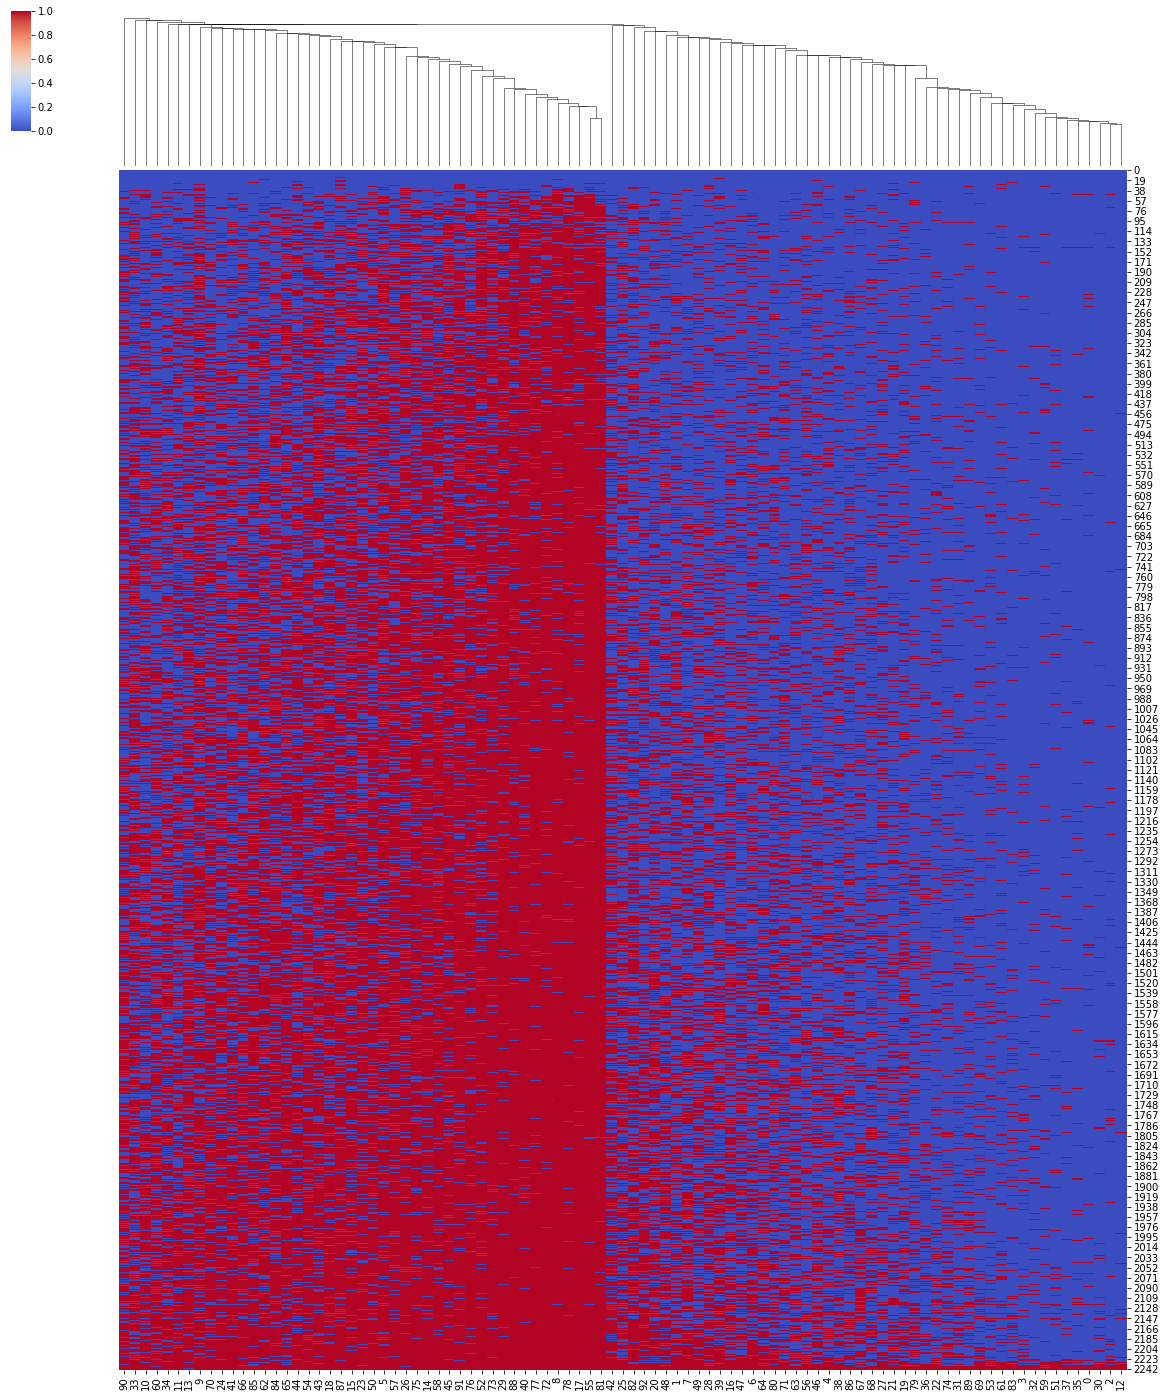

In [31]:

import seaborn as sns

profiles = (np.array(chrom_profiles) >=1).astype(np.int)
row_order = np.argsort(profiles.sum(1))
col_order = np.argsort(profiles.sum(0))
profiles = profiles[row_order]#[:,col_order]
g = sns.clustermap(profiles, col_cluster=True, row_cluster=False, method='single',figsize=(20,25), cmap='coolwarm')


# test removing some spots

In [22]:
reload(analysis)

<module 'ImageAnalysis3.analysis' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\analysis.py'>